In [2]:
import tensorflow as tf  
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras import layers, models
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [3]:
batch_size = 32
img_height = 48
img_width = 48

train_dir = 'Data_Sets/train'
test_dir = 'Data_Sets/test'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

class_names=train_ds.class_names
print('Emotion Categories',class_names)

Found 28709 files belonging to 7 classes.
Found 5908 files belonging to 5 classes.
Emotion Categories ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [4]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [5]:
normalization_layer=layers.Rescaling(1./255 )
train_ds=train_ds.map(lambda x,y:(normalization_layer(x),y))
val_ds=val_ds.map(lambda x,y:(normalization_layer(x),y))

In [7]:
import os
import pandas as pd

def count_images_per_class(directory):
    class_counts={}
    for emotion in os.listdir(directory):
        emotion_path=os.path.join(directory,emotion)
        if os.path.isdir(emotion_path):
            class_counts[emotion]=len(os.listdir(emotion_path))
    return class_counts

train_counts=count_images_per_class('Data_Sets/train')
test_counts=count_images_per_class('Data_Sets/test')

df_counts=pd.DataFrame({
    "Emotion":list(train_counts.keys()),
    "Train Count":list(train_counts.values()),
    "Test Count": [test_counts.get(emotion,0) for emotion in train_counts.keys()]
})

df_counts.sort_values("Train Count",ascending=False,inplace=True)
df_counts

,Emotion,Train Count,Test Count
3,happy,7215,1774
4,neutral,4965,1233
5,sad,4830,1247
2,fearful,4097,823
0,angry,3995,0
6,surprised,3171,831
1,disgusted,436,0


C:\Users\TenetStore\AppData\Local\Temp\ipykernel_6088\3560347239.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Emotion", y="Train Count",data=df_counts,palette="viridis")


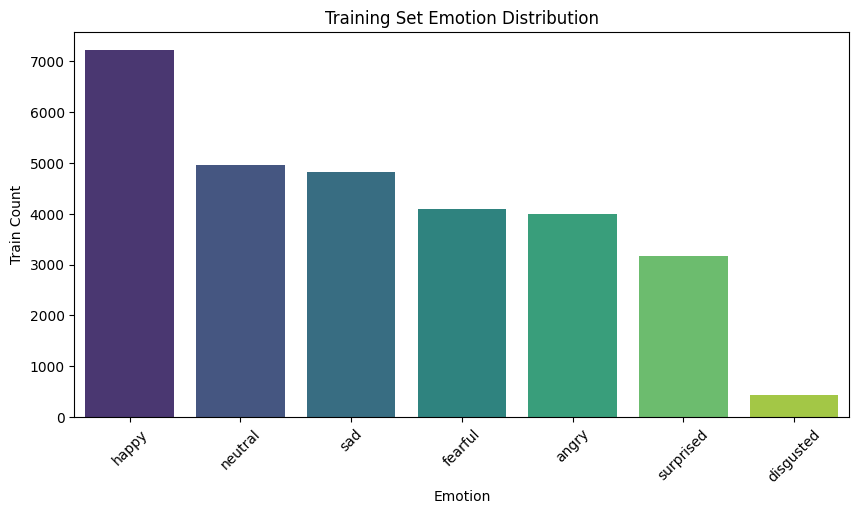

C:\Users\TenetStore\AppData\Local\Temp\ipykernel_6088\3560347239.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Emotion",y="Test Count", data=df_counts,palette="plasma")


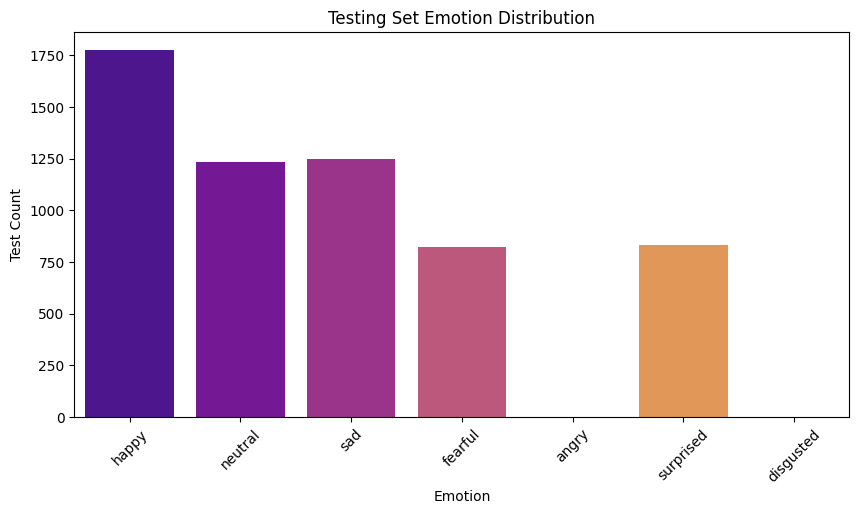

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.barplot(x="Emotion", y="Train Count",data=df_counts,palette="viridis")
plt.title("Training Set Emotion Distribution")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x="Emotion",y="Test Count", data=df_counts,palette="plasma")
plt.title("Testing Set Emotion Distribution")
plt.xticks(rotation=45)
plt.show()

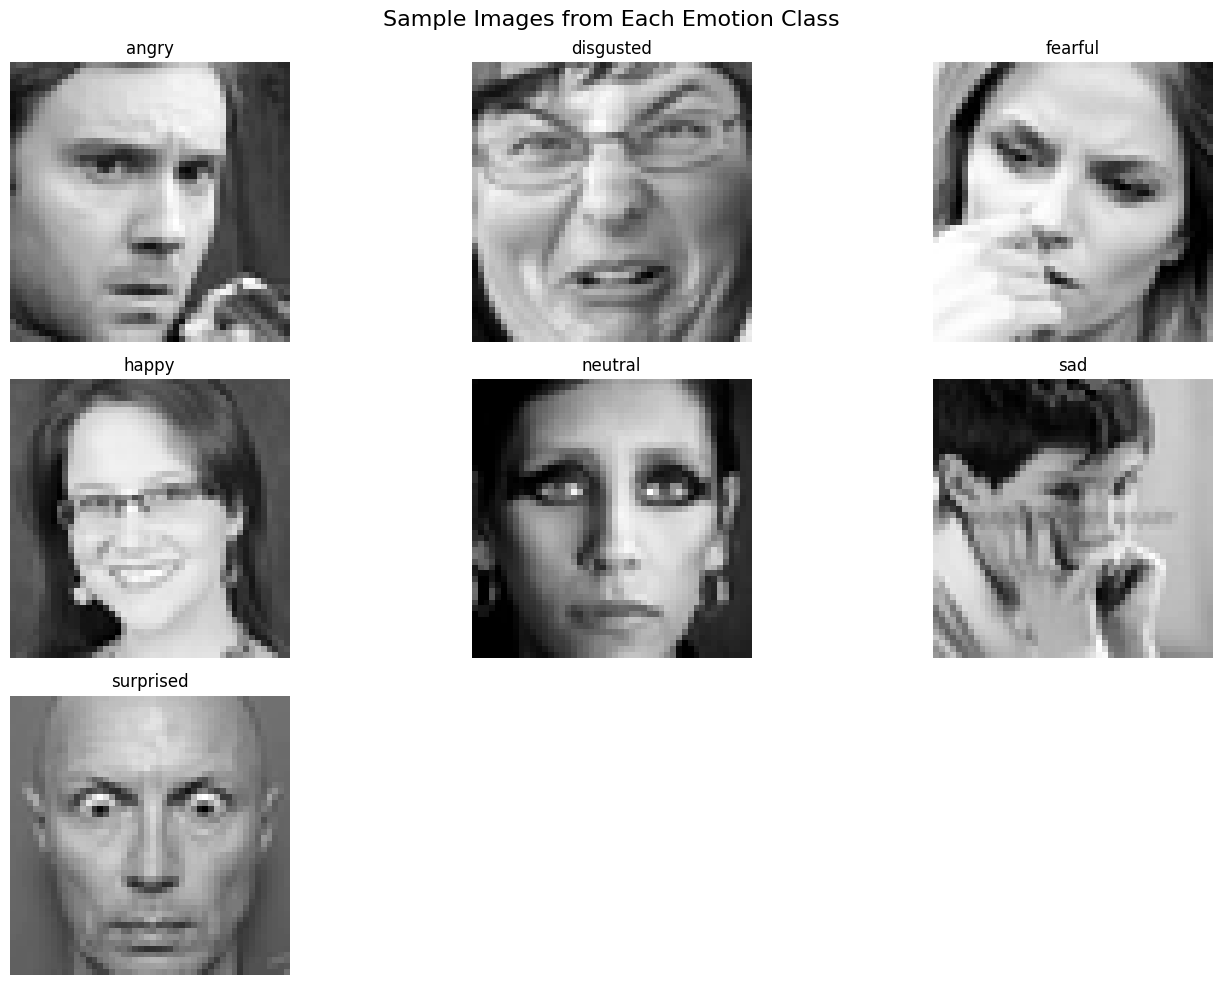

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_samples(data_dir, class_names):
    plt.figure(figsize=(14, 10))
    for i, class_name in enumerate(class_names):
        class_path = os.path.join(data_dir, class_name)
        image_name= os.listdir(class_path)[0]
        image_path = os.path.join(class_path, image_name)
        img= mpimg.imread(image_path)

        plt.subplot(3, 3, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(class_name)
        plt.axis('off')

    plt.suptitle('Sample Images from Each Emotion Class', fontsize=16)
    plt.tight_layout()
    plt.show()

show_samples('Data_Sets/train', class_names)

In [13]:
from PIL import Image
from collections import Counter

def get_image_shapes(directory):
    shapes = []
    for emotion in os.listdir(directory):
        emotion_path = os.path.join(directory, emotion)
        if os.path.isdir(emotion_path):
            for file in os.listdir(emotion_path):
                file = os.path.join(emotion_path, file)
                with Image.open(file) as img:
                    shapes.append(img.size)  # (width, height)
    return Counter(shapes)

train_shapes = get_image_shapes('Data_Sets/train')
print("Most common image shapes in training set:",train_shapes.most_common(5))

Most common image shapes in training set: [((48, 48), 28709)]


C:\Users\TenetStore\AppData\Local\Temp\ipykernel_6088\159156139.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Emotion", y="Train%", data=df_counts, palette="coolwarm")


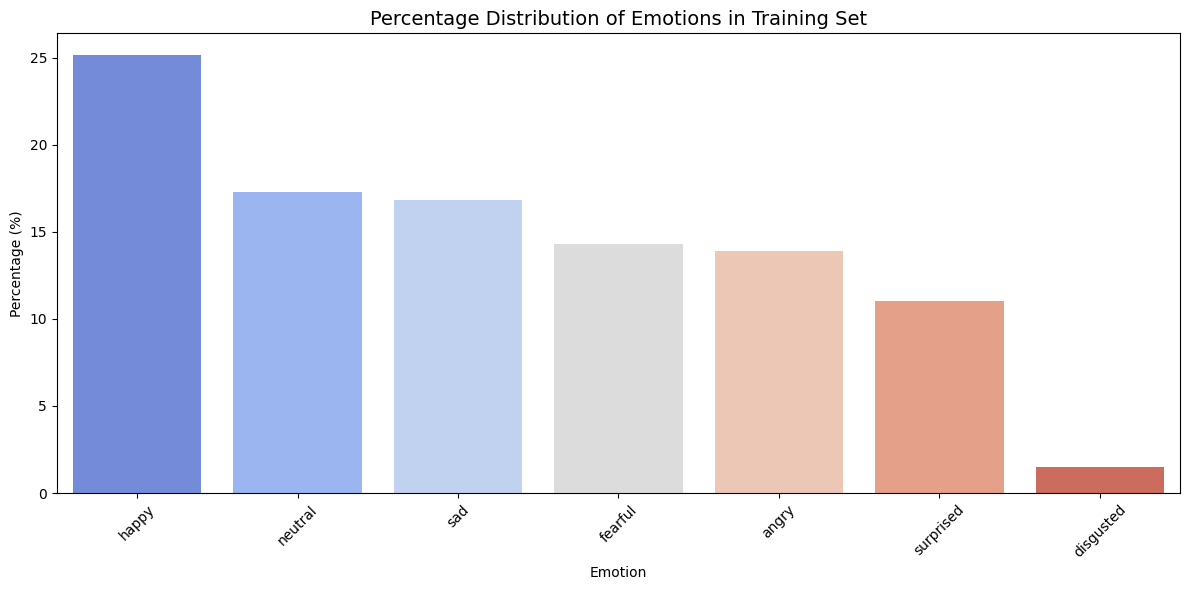

In [14]:
df_counts["Train%"]=(df_counts["Train Count"]/df_counts["Train Count"].sum())*100
df_counts["Test%"]=(df_counts["Test Count"]/df_counts["Test Count"].sum())*100

plt.figure(figsize=(12,6))
sns.barplot(x="Emotion", y="Train%", data=df_counts, palette="coolwarm")
plt.title("Percentage Distribution of Emotions in Training Set",fontsize=14)
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

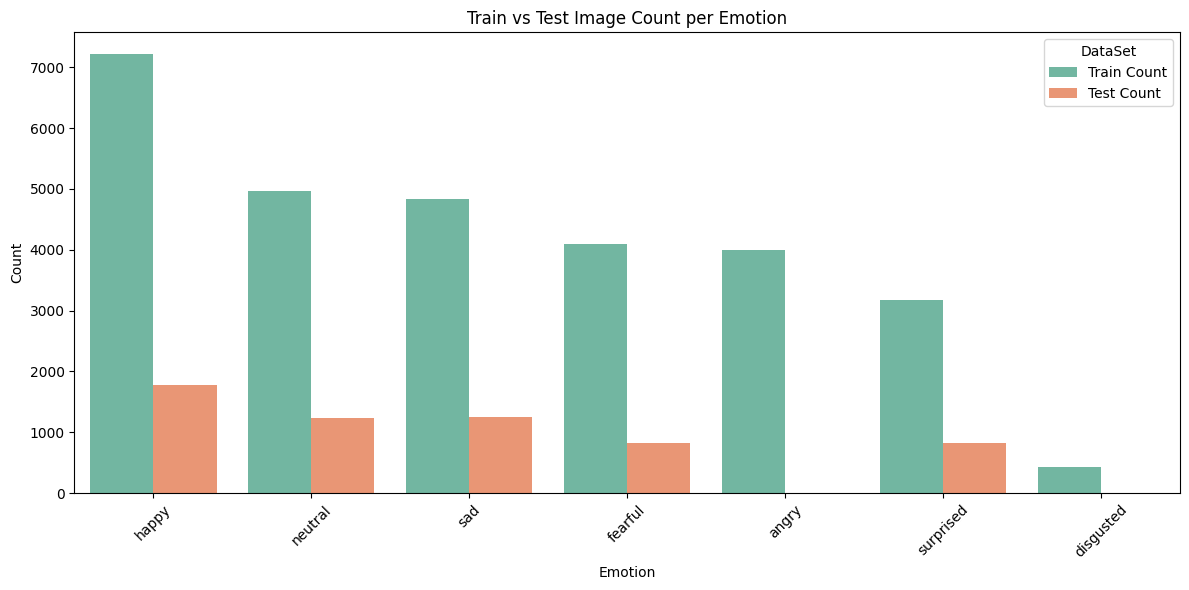

In [16]:
df_counts_melted = pd.melt(df_counts[["Emotion", "Train Count", "Test Count"]],id_vars=["Emotion"],var_name="DataSet",value_name="Count")
plt.figure(figsize=(12,6))
sns.barplot(data=df_counts_melted, x="Emotion", y="Count", hue="DataSet", palette="Set2")
plt.title("Train vs Test Image Count per Emotion")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\TenetStore\AppData\Local\Temp\ipykernel_6088\293644576.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=brightness_df, x="Emotion", y="Brightness", palette="Spectral")


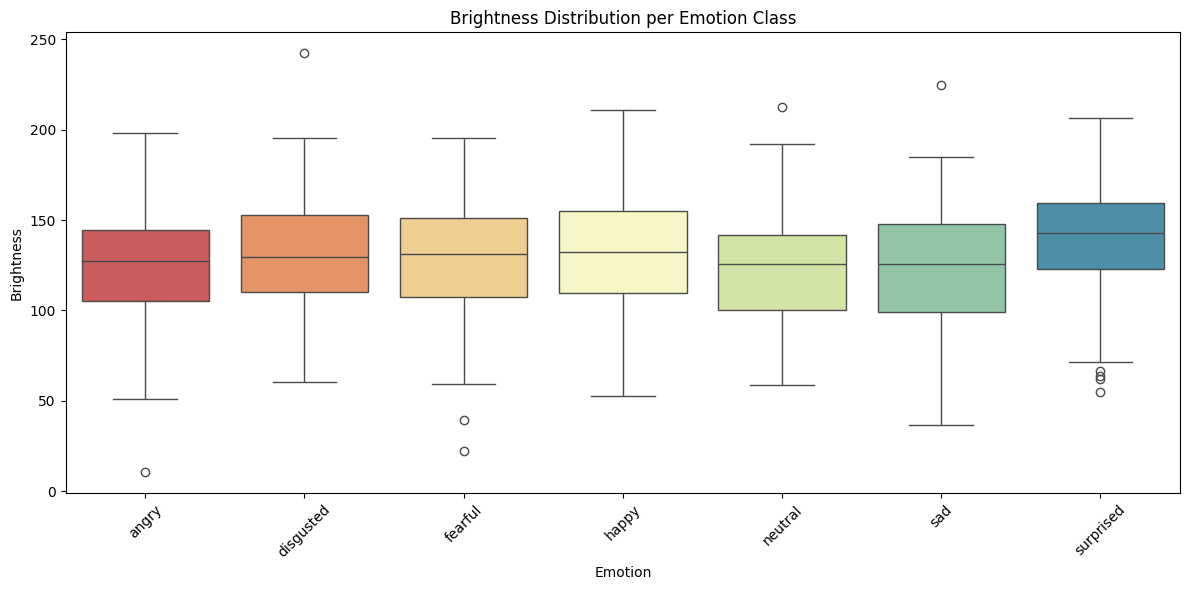

In [17]:
import cv2
def get_avg_brightness(directory):
    brightness_data=[]
    for label in os.listdir(directory):
        label_path=os.path.join(directory,label)
        if os.path.isdir(label_path):
            for img_name in os.listdir(label_path)[:100]:
                img_path=os.path.join(label_path,img_name)
                img=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    avg_brightness=np.mean(img)
                    brightness_data.append((label,avg_brightness))

    return pd.DataFrame(brightness_data,columns=["Emotion","Brightness"])

brightness_df=get_avg_brightness('Data_Sets/train')


plt.figure(figsize=(12,6))
sns.boxplot(data=brightness_df, x="Emotion", y="Brightness", palette="Spectral")
plt.title("Brightness Distribution per Emotion Class")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

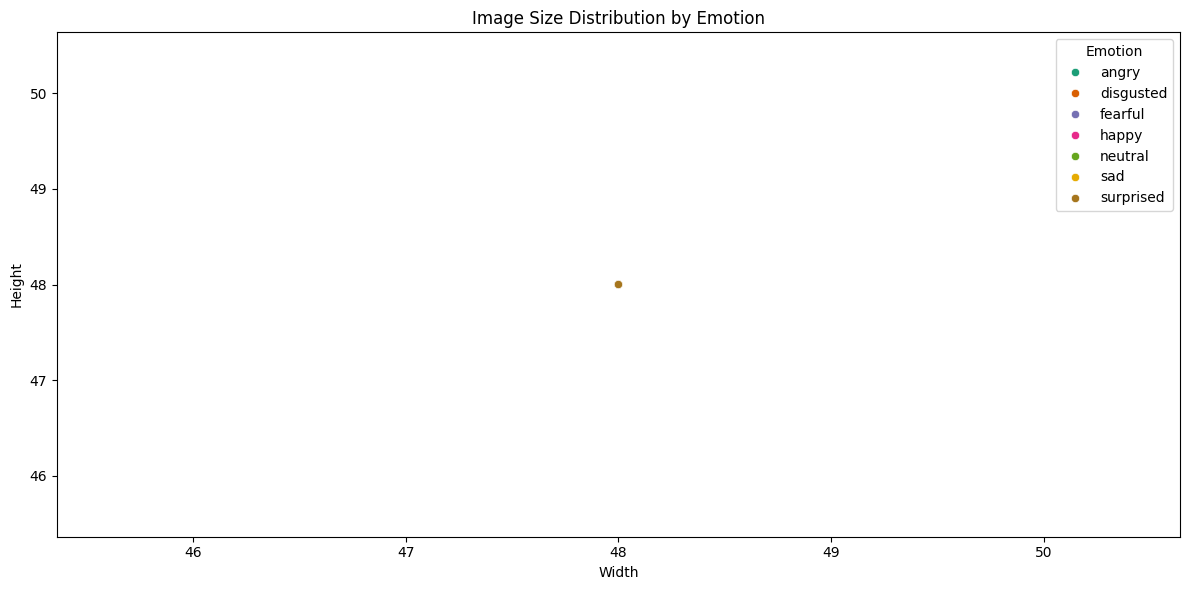

In [18]:
img_dims=[]

for emotion in os.listdir('Data_Sets/train'):
    class_path=os.path.join('Data_Sets/train',emotion)
    for img_name in os.listdir(class_path)[:100]:
        try:
            img=Image.open(os.path.join(class_path,img_name))
            img_dims.append((img.size[0], img.size[1],emotion))
        except:
            continue 

dim_df=pd.DataFrame(img_dims,columns=["Width","Height","Emotion"]) 

plt.figure(figsize=(12,6))
sns.scatterplot(data=dim_df, x="Width", y="Height", hue="Emotion", palette="Dark2")
plt.title("Image Size Distribution by Emotion")
plt.tight_layout()
plt.show()

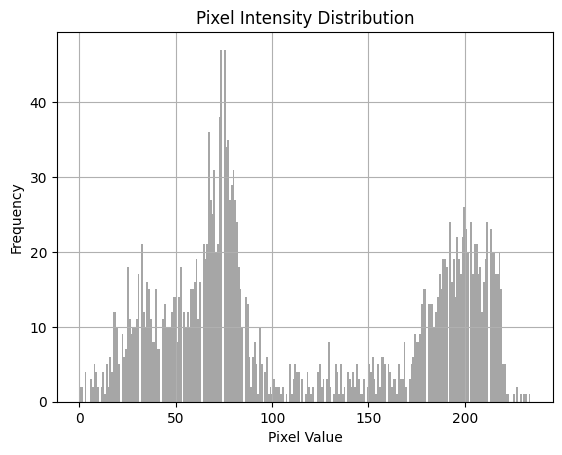

In [19]:
def plot_pixel_histogream(image_path):
    img=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
    plt.hist(img.ravel(),bins=256,color='gray',alpha=0.7)
    plt.title("Pixel Intensity Distribution")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

sample_image_path=os.path.join('Data_Sets/train/happy',os.listdir("Data_Sets/train/happy")[0])
plot_pixel_histogream(sample_image_path)

In [ ]:
def compute_mean_image(class_dir,img_size=(48,48)):
    images=[]
    for img_name in os.listdir(class_dir)[:200]:
        img_path=os.path.join(class_dir,img_name)
        img=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img_resized=cv2.resize(img,img_size)
            images.append(img_resized.astype(np.float32))
    if images:
        mean_img=np.mean(images,axis=0)
        return mean_img
    return None

plt.figure(figsize=(14,8))
for i ,emotion in enumerate(class_names):
    mean_img=compute_mean_image(os.path.join("Data_Sets/train",emotion))
    if mean_img is not None:
        plt.subplot(2,4,i+1)
        plt.imshow(mean_img,cmap='gray')
        plt.title(f"Mean Image: {emotion}")
        plt.axis('off')
plt.tight_layout()
plt.suptitle("Average Image Per Emotion", fontsize=16)
plt.show()

C:\Users\TenetStore\AppData\Local\Temp\ipykernel_6088\4077255950.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_blur,x='Emotion',y='Blur_Score',palette='coolwarm')


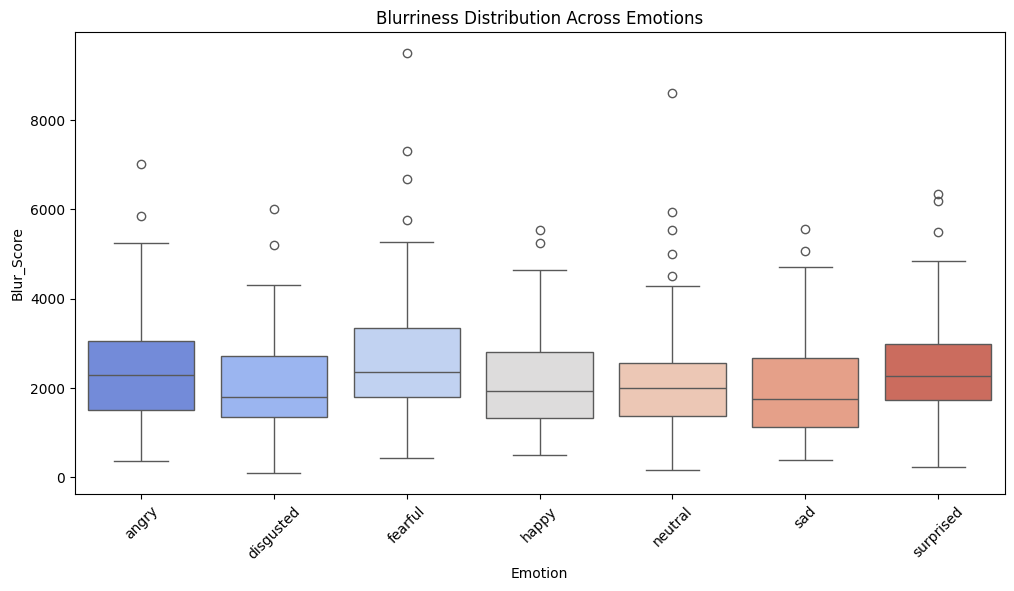

In [21]:
def compute_blurriness_score(image_path):
    image=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
    if image is not None:
        return cv2.Laplacian(image,cv2.CV_64F).var()
    return None

blur_scores=[]

for emotion in os.listdir('Data_Sets/train'):
    emotion_dir=os.path.join('Data_Sets/train',emotion)
    for img_name in os.listdir(emotion_dir)[:100]:
        img_path=os.path.join(emotion_dir,img_name)
        score=compute_blurriness_score(img_path)
        if score is not None:
            blur_scores.append((emotion,score))


df_blur=pd.DataFrame(blur_scores,columns=['Emotion','Blur_Score'])

plt.figure(figsize=(12,6))
sns.boxplot(data=df_blur,x='Emotion',y='Blur_Score',palette='coolwarm')
plt.title("Blurriness Distribution Across Emotions")
plt.xticks(rotation=45)
plt.show()

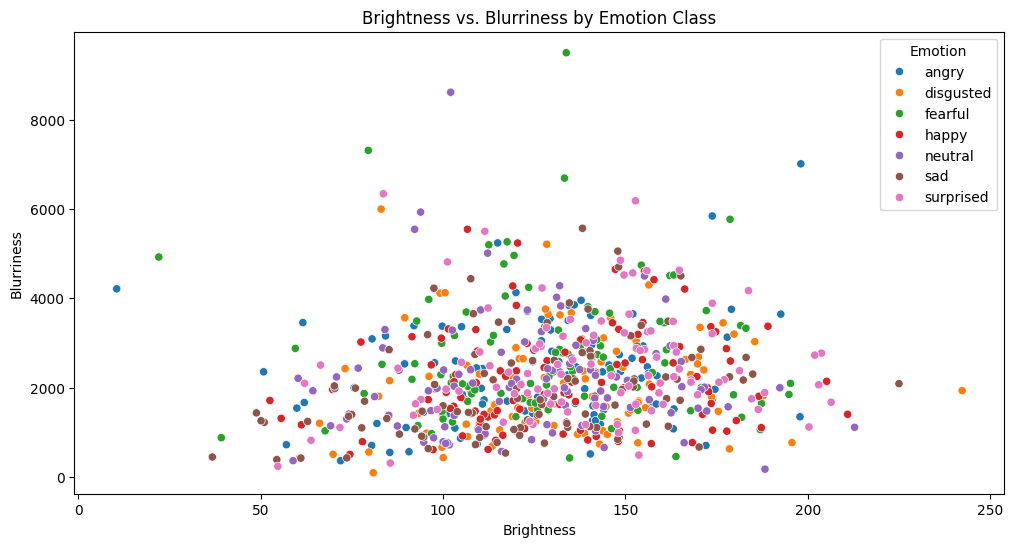

In [22]:
brightness_vs_blur=[]

for emotion in os.listdir('Data_Sets/train'):
    emotion_dir=os.path.join('Data_Sets/train',emotion)
    for img_name in os.listdir(emotion_dir)[:100]:
        img_path=os.path.join(emotion_dir,img_name)
        img=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        if img is not None:
            brightness=np.mean(img)
            blur_score=cv2.Laplacian(img,cv2.CV_64F).var()
            brightness_vs_blur.append((emotion,brightness,blur_score))

df_bvb=pd.DataFrame(brightness_vs_blur,columns=['Emotion','Brightness','Blurriness'])

plt.figure(figsize=(12,6))
sns.scatterplot(data=df_bvb,x="Brightness",y="Blurriness",hue="Emotion",palette='tab10')
plt.title("Brightness vs. Blurriness by Emotion Class")
plt.show()

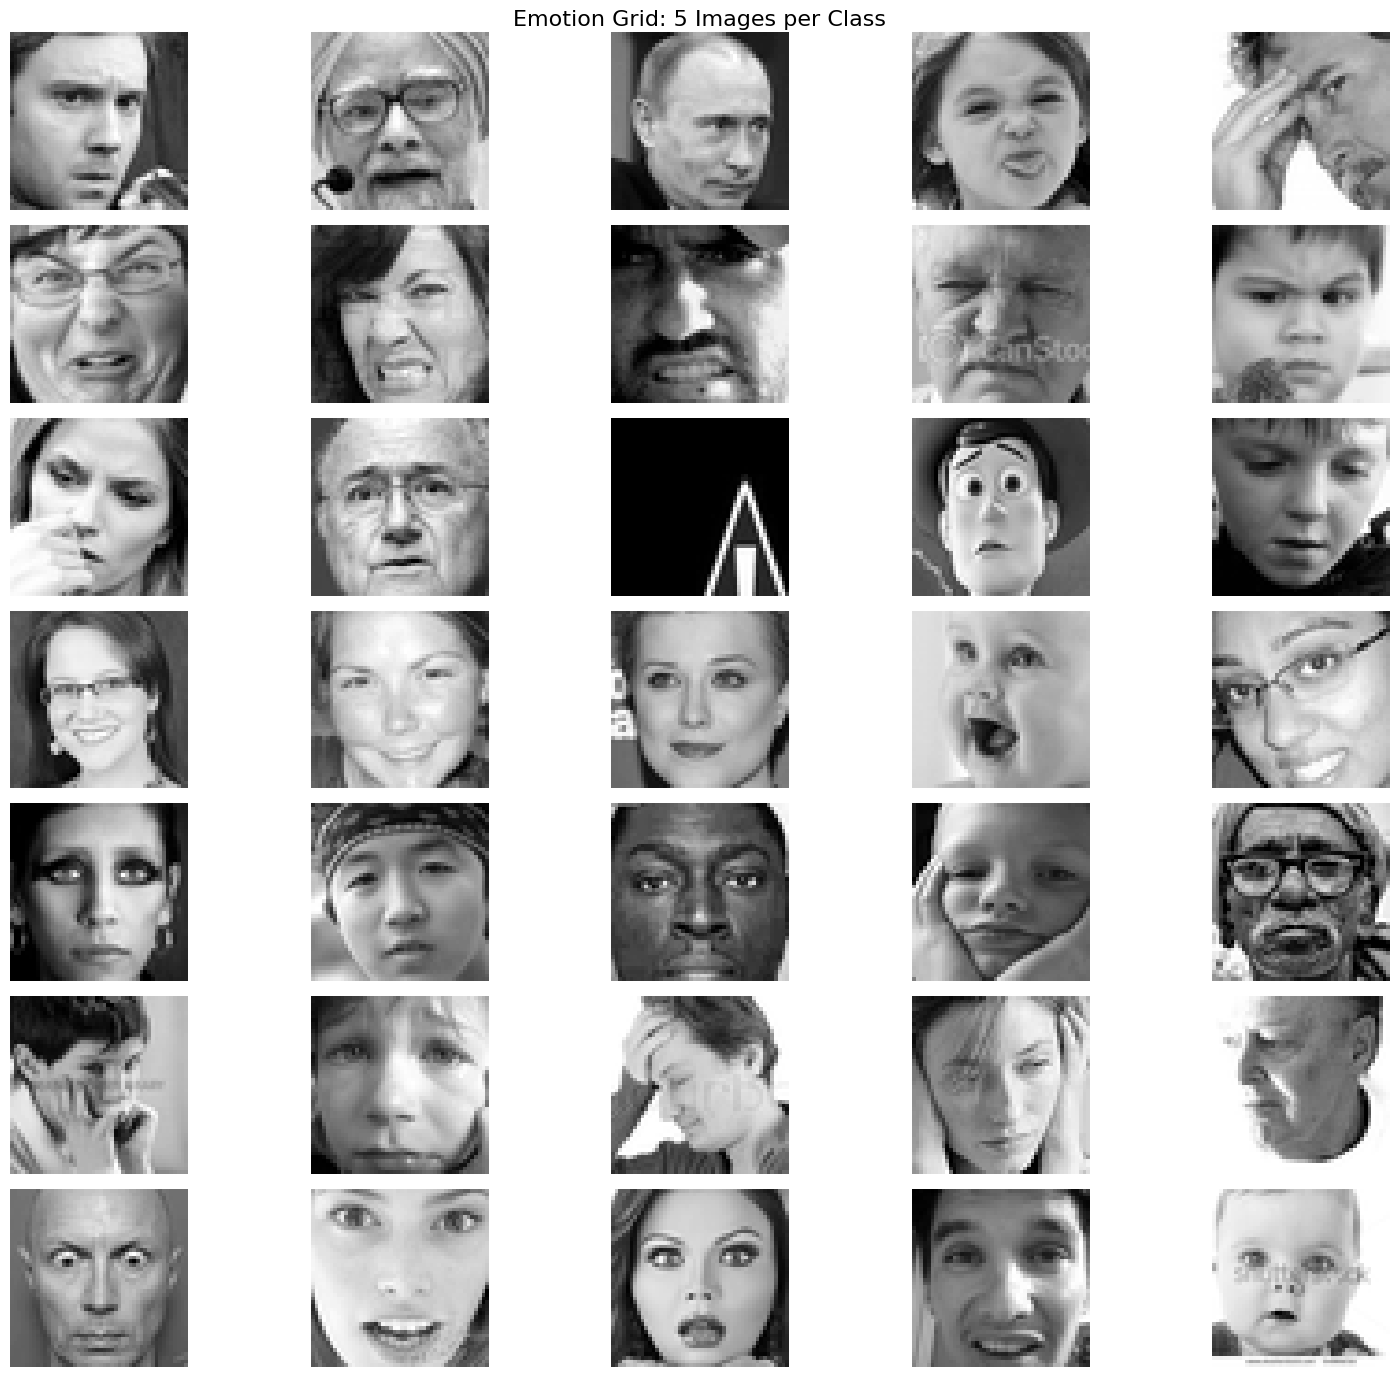

In [24]:
def plot_image_grid(directory, class_names, rows=7, cols=5):
    plt.figure(figsize=(16,14))
    for i, emotion in enumerate(class_names):
        emotion_dir= os.path.join(directory, emotion)
        images=  os.listdir(emotion_dir)[:cols]
        for j, img_name in enumerate(images):
            img_path= os.path.join(emotion_dir, img_name)
            img= cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
            if img is not None:
                plt.subplot(rows,cols,i* cols+j+1)
                plt.imshow(img,cmap='gray')
                plt.axis('off')
                if j==0:
                    plt.ylabel(emotion, fontsize=12)

    plt.suptitle('Emotion Grid: 5 Images per Class', fontsize=16)
    plt.tight_layout()
    plt.show()

plot_image_grid('Data_Sets/train', class_names)

C:\Users\TenetStore\AppData\Local\Temp\ipykernel_6088\1886270711.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_stats, x='Emotion', y='Skewness', palette='Set2')


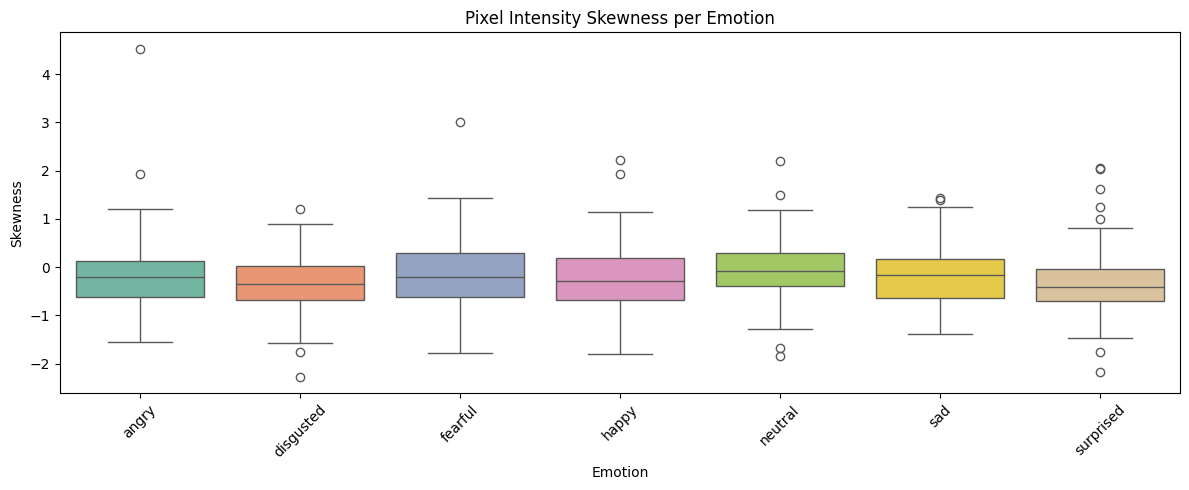

C:\Users\TenetStore\AppData\Local\Temp\ipykernel_6088\1886270711.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_stats, x='Emotion', y='Kurtosis', palette='Set1')


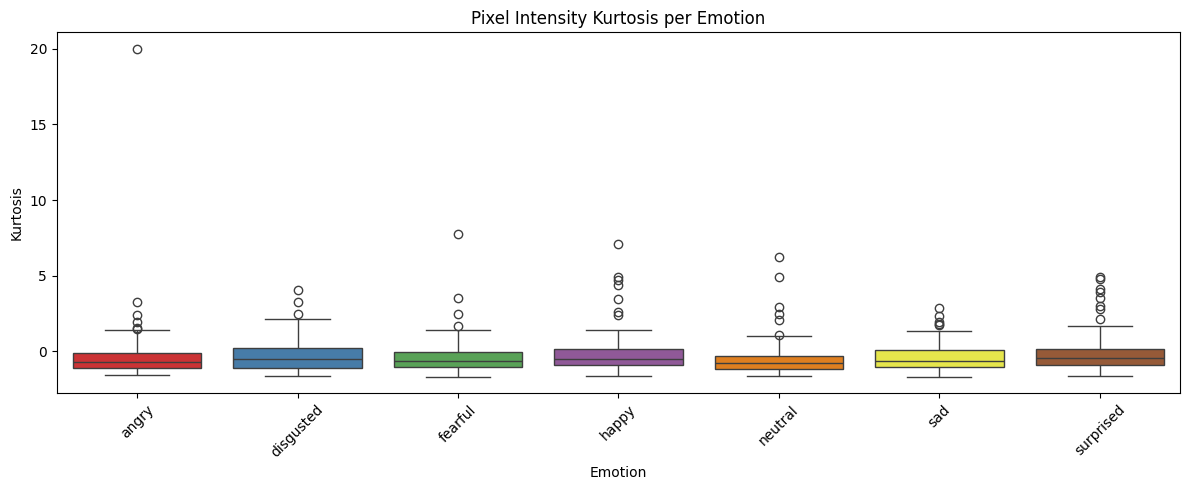

In [25]:
from scipy.stats import skew, kurtosis

stats = []

for emotion in os.listdir('Data_Sets/train'):
    emotion_dir = os.path.join('Data_Sets/train', emotion)
    for img_name in os.listdir(emotion_dir)[:100]:
        img_path = os.path.join(emotion_dir, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            flat_pixels = img.flatten()
            stats.append({
                "Emotion": emotion,
                "Skewness": skew(flat_pixels),
                "Kurtosis": kurtosis(flat_pixels)
            })

df_stats = pd.DataFrame(stats)

plt.figure(figsize=(12,5))
sns.boxplot(data=df_stats, x='Emotion', y='Skewness', palette='Set2')
plt.title("Pixel Intensity Skewness per Emotion")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(data=df_stats, x='Emotion', y='Kurtosis', palette='Set1')
plt.title("Pixel Intensity Kurtosis per Emotion")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\TenetStore\AppData\Local\Temp\ipykernel_6088\1008140617.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_entropy, x='Emotion', y='Entropy', palette='magma')


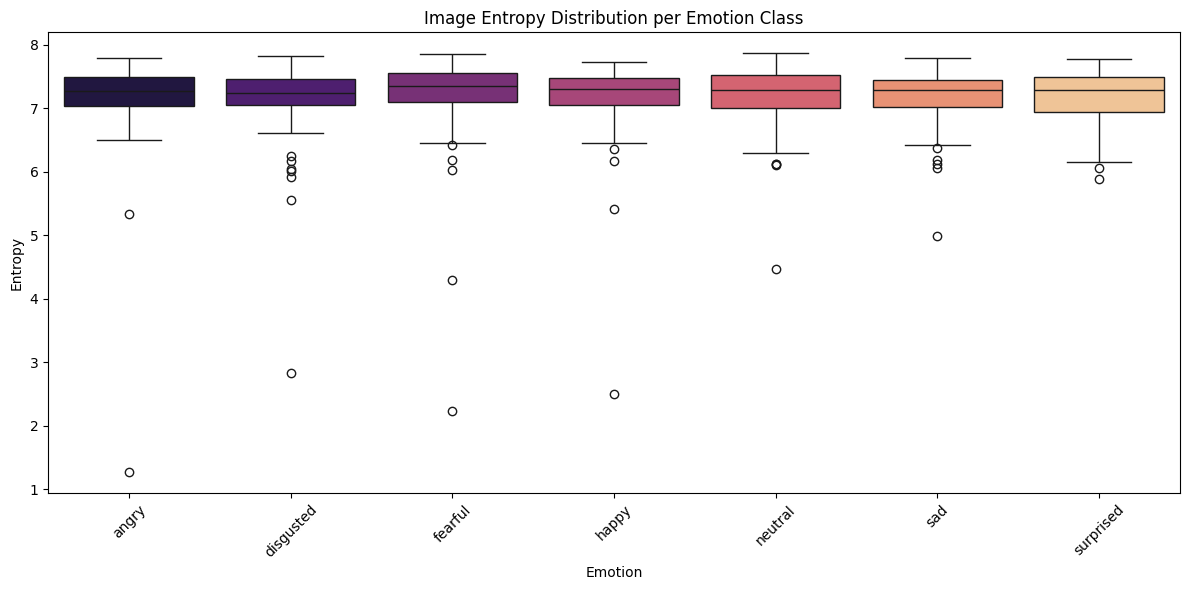

In [26]:
from scipy.stats import entropy as calc_entropy

entropy_data = []

for emotion in os.listdir('Data_Sets/train'):
    emotion_dir = os.path.join('Data_Sets/train', emotion)
    for img_name in os.listdir(emotion_dir)[:150]:
        img_path = os.path.join(emotion_dir, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            hist = cv2.calcHist([img], [0], None, [256], [0,256])
            hist = hist.ravel() / hist.sum()
            ent = calc_entropy(hist, base=2)
            entropy_data.append((emotion, ent))

df_entropy = pd.DataFrame(entropy_data, columns=['Emotion', 'Entropy'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_entropy, x='Emotion', y='Entropy', palette='magma')
plt.title("Image Entropy Distribution per Emotion Class")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

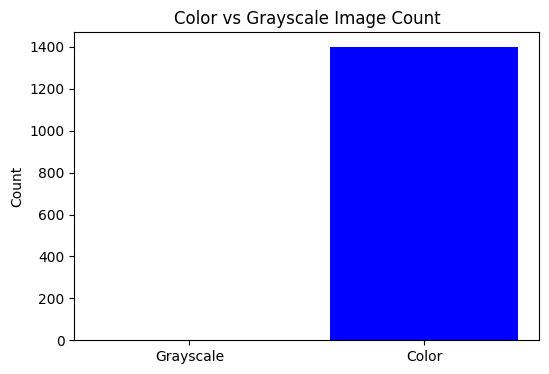

In [27]:
color_counts = {"Grayscale": 0, "Color": 0}

for emotion in os.listdir('Data_Sets/train'):
    emotion_dir = os.path.join('Data_Sets/train', emotion)
    for img_name in os.listdir(emotion_dir)[:200]:
        img_path = os.path.join(emotion_dir, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            if len(img.shape) == 3 and img.shape[2] == 3:
                color_counts["Color"] += 1
            else:
                color_counts["Grayscale"] += 1

plt.figure(figsize=(6, 4))
plt.bar(color_counts.keys(), color_counts.values(), color=['gray', 'blue'])
plt.title("Color vs Grayscale Image Count")
plt.ylabel("Count")
plt.show()

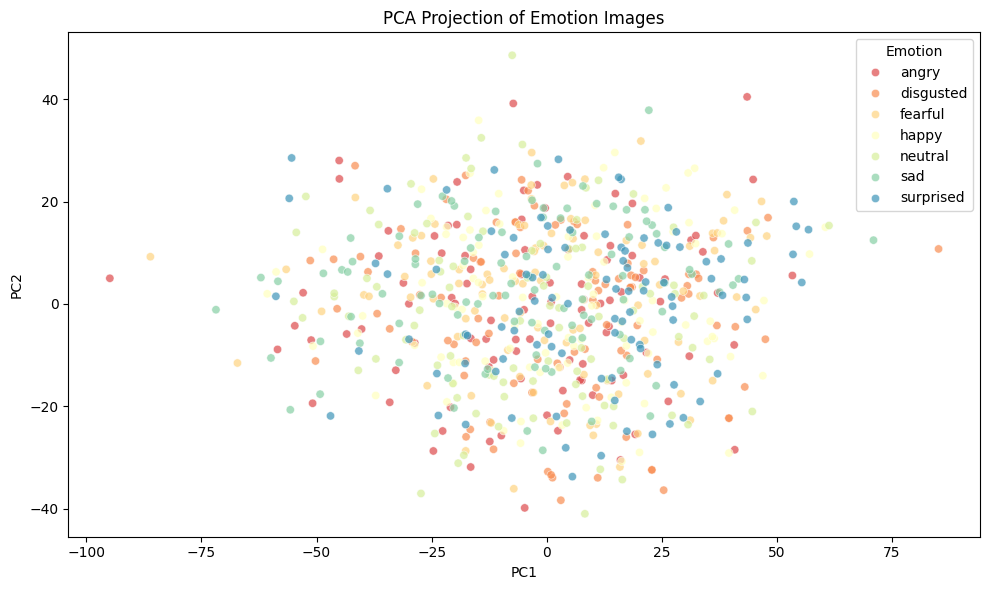

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

img_data = []
img_labels = []

for label in os.listdir('Data_Sets/train'):
    path = os.path.join('Data_Sets/train', label)
    for img_name in os.listdir(path)[:100]:
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img= cv2.resize(img, (48, 48))
            img_flat = img.flatten()
            img_data.append(img_flat)
            img_labels.append(label)
X=StandardScaler().fit_transform(img_data)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca= pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Emotion'] = img_labels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Emotion', palette='Spectral', alpha=0.7)
plt.title("PCA Projection of Emotion Images")
plt.tight_layout()
plt.show()

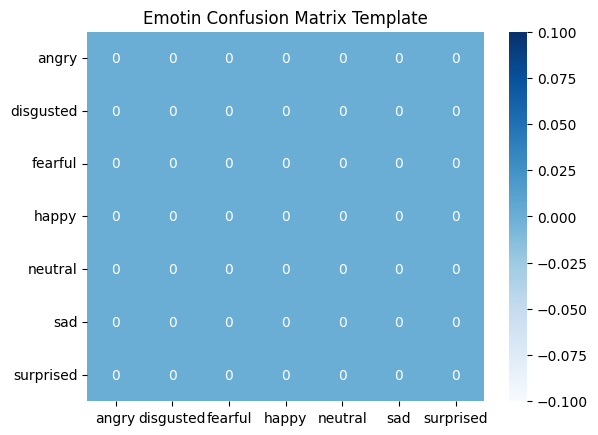

In [29]:
conf_matrix=pd.DataFrame(np.zeros((7,7)),index=class_names, columns=class_names)
sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues')
plt.title("Emotin Confusion Matrix Template")
plt.show()

In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import os

In [31]:
batch_size = 32
img_size = (48, 48)
train_ds = image_dataset_from_directory(
    "Data_Sets/train",
    label_mode='int',
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True)

val_ds = image_dataset_from_directory(
    "Data_Sets/test",
    label_mode='int',
    image_size=img_size,
    batch_size=batch_size)

class_names = train_ds.class_names
num_classes = len(class_names)
print("Class Names:", class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 28709 files belonging to 7 classes.
Found 5908 files belonging to 5 classes.
Class Names: ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [32]:
y_labels = []
for images, labels in train_ds.unbatch():
    y_labels.append(labels.numpy())

class_weights = compute_class_weight(class_weight='balanced',
                                        classes=np.unique(y_labels),
                                        y=y_labels)
class_weights = {i: w for i, w in enumerate(class_weights)}

print("Class Weights:", class_weights)

Class Weights: {0: 1.0266046844269623, 1: 9.406618610747051, 2: 1.0010460615781582, 3: 0.5684387684387684, 4: 0.8260394187886635, 5: 0.8491274770777877, 6: 1.293372978330405}


In [33]:
def build_emotion_cnn(input_shape=(48, 48, 3),num_classes=7):
    model = models.Sequential()
    model.add(layers.Rescaling(1./255, input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

model= build_emotion_cnn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 48, 48, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 128)      512       
 ormalization)                                          

In [34]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
]

In [40]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    class_weight=class_weights,
    callbacks=callbacks
)

Epoch 1/50
898/898 [==============================] - 534s 595ms/step - loss: 1.7903 - accuracy: 0.2998 - val_loss: 6.1590 - val_accuracy: 0.1385
Epoch 2/50
898/898 [==============================] - 368s 410ms/step - loss: 1.6450 - accuracy: 0.3565 - val_loss: 3.3184 - val_accuracy: 0.1046
Epoch 3/50
898/898 [==============================] - 468s 521ms/step - loss: 1.6274 - accuracy: 0.3613 - val_loss: 2.9802 - val_accuracy: 0.1071
Epoch 4/50
898/898 [==============================] - 5359s 6s/step - loss: 1.6032 - accuracy: 0.3676 - val_loss: 3.3133 - val_accuracy: 0.1542
Epoch 5/50
898/898 [==============================] - 347s 387ms/step - loss: 1.5393 - accuracy: 0.3930 - val_loss: 3.6105 - val_accuracy: 0.0604
Epoch 6/50
898/898 [==============================] - 337s 375ms/step - loss: 1.4835 - accuracy: 0.4115 - val_loss: 3.3482 - val_accuracy: 0.0836
Epoch 7/50
898/898 [==============================] - 333s 371ms/step - loss: 1.4616 - accuracy: 0.4234 - val_loss: 3.4047 - v

In [41]:
model.save("ML_Models/Emotion_Recognition_Model.h5")

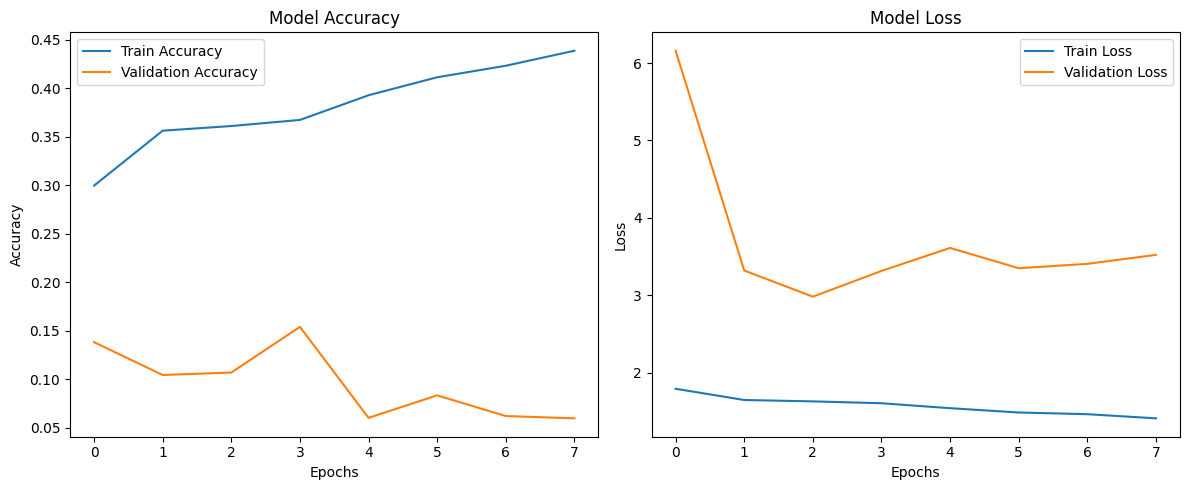

In [43]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_history(history)